In [2]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = os.path.join(
        os.getcwd(),
        "data/kmrd/kmr_dataset/datafile/kmrd-small"
    )
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [3]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]
peoples_df = dataframes[DB.PEOPLES.value]

print("castings_df")
print(castings_df.head())
print("countries_df")
print(countries_df.head())
print("genres_df")
print(genres_df.head())

castings_df
   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
3  10001   47952      4        1
4  10001   47953      5        0
countries_df
   movie country
0  10001    이탈리아
1  10001     프랑스
2  10002      미국
3  10003      미국
4  10004      미국
genres_df
   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF
3  10002     코미디
4  10003      SF


In [4]:
print("rates_df")
print(rates_df.head())
print("movies_df")
print(movies_df.head())
print("peoples_df")
print(peoples_df.head())

rates_df
   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340
movies_df
   movie                 title                           title_eng    year  \
0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
1  10002              빽 투 더 퓨쳐           Back To The Future , 1985  2015.0   
2  10003            빽 투 더 퓨쳐 2    Back To The Future Part 2 , 1989  2015.0   
3  10004            빽 투 더 퓨쳐 3  Back To The Future Part III , 1990  1990.0   
4  10005  스타워즈 에피소드 4 - 새로운 희망                    Star Wars , 1977  1997.0   

     grade  
0   전체 관람가  
1  12세 관람가  
2  12세 관람가  
3   전체 관람가  
4       PG  
peoples_df
   people    korean        original
0       5    아담 볼드윈    Adam Baldwin
1       8   애드리안 라인     Adrian Lyne
2       9     에이단 퀸     Aidan Quinn
3      13  구로사와 아키라  Akira Kurosawa
4      15     알 파치노       Al Pacino


In [5]:
# 결측치 확인
def print_missing_values():
    print("결측치 확인:")
    print(movies_df.isnull().sum())
    print(castings_df.isnull().sum())
    print(countries_df.isnull().sum())
    print(genres_df.isnull().sum())
    print(rates_df.isnull().sum())

def remove_missing_values():
    movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
    movies_df['grade'] = pd.to_numeric(movies_df['grade'], errors='coerce')

    year_median = movies_df['year'].median() if not movies_df['year'].isna().all() else 0
    grade_median = movies_df['grade'].median() if not movies_df['grade'].isna().all() else 0

    # Fill missing values
    movies_df.fillna({
        'title': 'Unknown',
        'title_eng': 'Unknown',
        'year': year_median,
        'grade': grade_median
    }, inplace=True)

    peoples_df.fillna({
        'original': 'Unknown'
    }, inplace=True)

print_missing_values()

결측치 확인:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [6]:
remove_missing_values()
print_missing_values()

결측치 확인:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 6})  # Set the font size to 14
plt.figure(figsize=(16, 9))


<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

### 상관관계 (Correlation)란?

상관관계는 두 변수 간의 선형 관계를 측정하는 방법입니다. 상관관계를 통해 두 변수가 어떻게 서로 관련이 있는지, 즉 하나의 변수가 증가하면 다른 변수가 어떻게 반응하는지 등을 파악할 수 있습니다.

- **정의**: 상관관계는 두 변수 간의 관계를 수치화한 지표로, 그 값이 -1에서 1 사이에 있습니다.
  - **1에 가까울수록**: 양의 상관관계, 즉 하나의 변수가 증가하면 다른 변수도 증가하는 경향을 의미합니다.
  - **-1에 가까울수록**: 음의 상관관계, 즉 하나의 변수가 증가하면 다른 변수가 감소하는 경향을 의미합니다.
  - **0에 가까울수록**: 두 변수 간에 거의 또는 완전히 선형적인 관계가 없는 것을 의미합니다.

### 상관관계가 필요한 이유

1. **데이터 이해를 위한 기초 분석**: 상관관계 분석은 데이터 간의 관계를 이해하는 데 도움을 줍니다. 이를 통해 변수 간의 관계를 파악하고, 데이터의 특징을 더 잘 이해할 수 있습니다.
  
2. **피처 엔지니어링 (Feature Engineering)**: 기계학습 모델을 구축할 때, 상관관계가 높은 변수는 다중공선성(Multicollinearity) 문제를 일으킬 수 있습니다. 따라서 상관관계 분석을 통해 중요한 변수를 선별하거나, 불필요한 변수를 제거할 수 있습니다.

3. **예측 모델 성능 향상**: 상관관계가 높은 변수를 제거함으로써 모델의 과적합(Overfitting)을 방지하고, 모델의 일반화 성능을 향상시킬 수 있습니다.

4. **비즈니스 결정 지원**: 예를 들어, 마케팅에서는 고객의 구매 행동과 다른 변수 간의 상관관계를 분석하여, 어떤 요인이 고객 구매 행동에 가장 큰 영향을 미치는지 파악할 수 있습니다.

### 구체적 사례

1. **금융 분야**: 주식 가격 간의 상관관계를 분석하여, 포트폴리오 다각화를 통해 리스크를 줄이는 전략을 수립할 수 있습니다. 예를 들어, 두 주식이 음의 상관관계를 가지면, 하나가 하락할 때 다른 하나가 상승할 가능성이 높아 리스크를 분산시킬 수 있습니다.

2. **헬스케어 분야**: 건강 관련 변수들 간의 상관관계를 분석하여, 특정 질병과 관련된 주요 위험 요인을 파악할 수 있습니다. 예를 들어, 혈압과 체중 간의 상관관계를 분석하여, 체중이 증가함에 따라 혈압이 높아지는 경향이 있는지 확인할 수 있습니다.

3. **마케팅 분야**: 고객의 구매 행동과 마케팅 캠페인 간의 상관관계를 분석하여, 어떤 마케팅 전략이 고객 구매 행동에 가장 큰 영향을 미치는지 파악할 수 있습니다. 이를 기반으로, 더 효과적인 마케팅 전략을 수립할 수 있습니다.

4. **기후학 분야**: 기온과 이산화탄소 농도 간의 상관관계를 분석하여, 기후 변화와 인류 활동 간의 관계를 이해할 수 있습니다.

### 주의 사항

- **상관관계는 인과관계를 의미하지 않음**: 상관관계가 높다고 해서, 하나의 변수가 다른 변수를 일으키는 것은 아닙니다. 단순히 두 변수 간에 관계가 있음을 의미할 뿐입니다.
- **데이터의 선형성 가정**: Pearson 상관계수는 선형 관계를 가정하므로, 비선형 관계를 가진 데이터에서는 상관관계가 정확히 반영되지 않을 수 있습니다. 이때는 Spearman이나 Kendall 상관계수를 사용하는 것이 더 좋을 수 있습니다.

### 결론

상관관계 분석은 데이터 분석의 기초적인 방법 중 하나로, 변수 간의 관계를 이해하고, 데이터의 특징을 파악하는 데 중요한 역할을 합니다. 이를 통해 더 나은 결정을 내릴 수 있으며, 기계학습 모델의 성능도 향상시킬 수 있습니다.

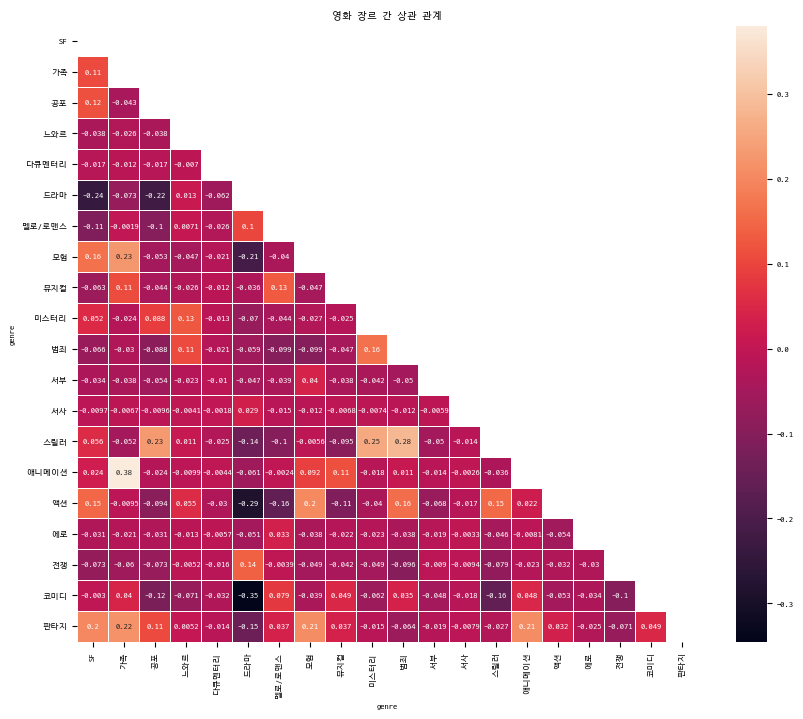

In [20]:
import numpy as np

# 영화의 장르 피벗 테이블 생성
genre_pivot = genres_df.pivot_table(index='movie', columns='genre', aggfunc='size', fill_value=0)
# print(genre_pivot)
genre_corr = genre_pivot.corr()
# print(genre_corr)

# 상삼각 행렬을 만들어 마스크로 사용 -> 하삼각 행렬을 만들 mask 생성
mask = np.triu(np.ones_like(genre_corr, dtype=bool))
# print(np.ones_like(genre_corr, dtype=bool))
# print(mask)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(genre_corr, mask=mask, annot=True, linewidths=0.5)
plt.title('영화 장르 간 상관 관계')
plt.show()